In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
import sys, os
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from numpy.testing import assert_array_almost_equal
from sklearn.decomposition import PCA
import scipy as sp
from sklearn import decomposition

In [104]:
partb=pd.read_csv('TypicalWeekdayProfile.txt',delimiter='\t',header=None)

In [105]:
partb.shape

(1255, 96)

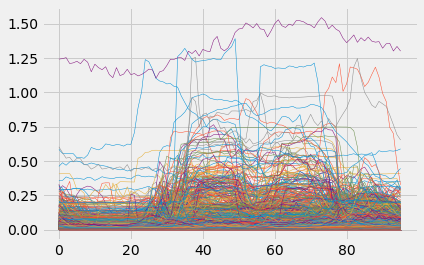

In [106]:
plt.gca()
for i in range(len(partb)):
    plt.plot(range(96),partb.iloc[i], '-', linewidth = 0.5)

In [125]:
pca = decomposition.PCA(n_components = 6)
pca.fit(partb)  

PCA(n_components=6)

In [140]:
pca_6={}
pc_name = ['PC ' + str(i+1) for i in range(6)]

for x in range(len(pc_name)):
    pca_6[pc_name[x]]= pca.components_[x]

pca_6


{'PC 1': array([0.05428447, 0.05376597, 0.05322608, 0.05214559, 0.05173514,
        0.05132967, 0.0504546 , 0.05029576, 0.0494598 , 0.04839796,
        0.0489567 , 0.04895376, 0.04857329, 0.04906245, 0.04836489,
        0.04770234, 0.04945565, 0.04862671, 0.0485558 , 0.04928018,
        0.04809825, 0.04881078, 0.05010835, 0.05095609, 0.05297101,
        0.05387934, 0.05383905, 0.05390535, 0.05737211, 0.0603735 ,
        0.06490213, 0.06952587, 0.07736808, 0.09198766, 0.1025687 ,
        0.11364899, 0.12919845, 0.13877416, 0.14220434, 0.14049475,
        0.14326126, 0.14459846, 0.14807034, 0.15007594, 0.15024494,
        0.14889075, 0.14932886, 0.1493954 , 0.14901397, 0.14825468,
        0.14062534, 0.1329927 , 0.12616691, 0.12204403, 0.11991234,
        0.12078752, 0.12984168, 0.13107924, 0.13133217, 0.13380525,
        0.13810483, 0.14165397, 0.1443332 , 0.14517143, 0.14528965,
        0.14377241, 0.14530161, 0.14485584, 0.1433868 , 0.14234321,
        0.14007619, 0.13765231, 0.133202

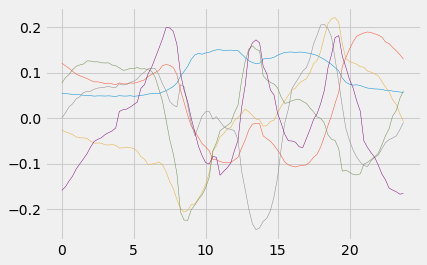

In [147]:
plt.gca
pca_6 = pd.DataFrame(pca_6) 
x=np.arange(0,24,0.25)
for i in range(6):
    plt.plot(x,pca_6.iloc[:,i], '-', linewidth = 0.5)

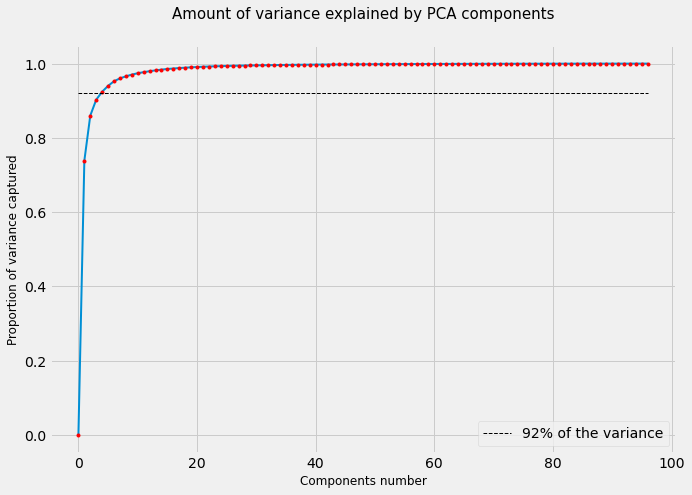

The first 4 PC capture 92.43% of the variance


In [107]:
n_components = 96

pca = PCA(n_components = n_components) #here you can do the plot with any number of n_components
pca.fit(partb)
list_variance = pca.explained_variance_ratio_

plt.figure(figsize = (10,7))
ax = plt.gca()
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),linewidth = 2)
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),'.',c='r',markersize = 6)
plt.plot(range(0, n_components+1),[0.92 for i in range(0, n_components+1)],'--',c = 'black',
         linewidth = 1,label="92% of the variance")
plt.legend()
plt.xlabel('Components number',fontsize = 12)
plt.ylabel('Proportion of variance captured',fontsize = 12)
plt.title('Amount of variance explained by PCA components',fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(0, 22, step=1))
ax.grid(True)
plt.show()
print("The first 4 PC capture {:.2f}%".format(100*(np.cumsum([0] + list(list_variance))[4])),"of the variance")

In [108]:
pca = decomposition.PCA(n_components = 96)
pca.fit(partb)

PCA(n_components=96)

In [109]:
from sklearn.cluster import KMeans

pca = PCA(96)
projected_data = pca.fit_transform(partb)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected_data)
    Sum_of_squared_distances.append(km.inertia_)

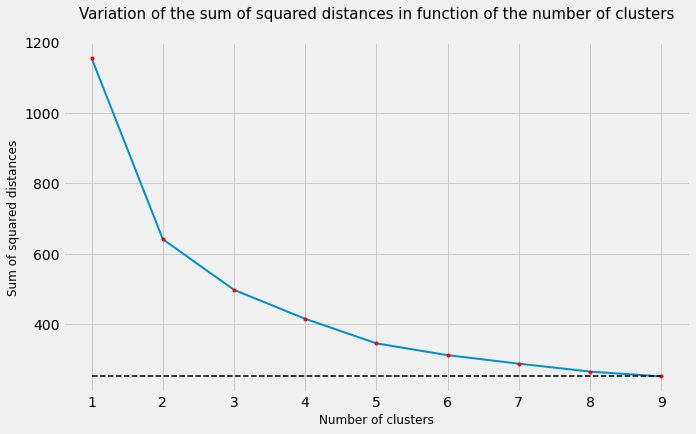

In [110]:
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.plot(K, Sum_of_squared_distances, linewidth = 2)
plt.plot(K, Sum_of_squared_distances, '.', c='r',markersize = 6)
plt.plot(K,[Sum_of_squared_distances[-1] for i in range(len(Sum_of_squared_distances))],'--',
         linewidth = 1.5, c = 'black')

plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Sum of squared distances', fontsize = 12)
plt.title('Variation of the sum of squared distances in function of the number of clusters', fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(1, 21, step=1))
ax.grid(True)
plt.show()

In [111]:
Mbw_score = pca.transform(partb) 

In [112]:
pca = PCA(96)
projected_data = pca.fit_transform(partb)
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters)

In [113]:
# fit kmeans object to data
kmeans.fit(projected_data)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(projected_data)  ## based on centroids their colors below are cyan, red, black and blue 

[[ 2.13092942e-01  1.34999670e-01  2.33317915e-02 -3.33772281e-02
  -9.73757117e-03 -8.17280376e-03  1.68442670e-02 -6.78029068e-03
   1.12142050e-04  7.49633057e-03  8.64615393e-03 -1.56272653e-03
   7.01827109e-05 -3.21015713e-03 -1.41048964e-04 -2.29122686e-04
  -1.28911893e-03 -3.74123319e-03  2.92531600e-04  1.71299509e-03
   1.79737682e-04  1.20704348e-03  9.79989568e-04  1.29448964e-03
   4.53362954e-04  7.56696731e-04 -1.01427719e-03  5.56847006e-05
  -4.93922411e-04  1.60419695e-04  4.49175381e-04  1.80958174e-04
   9.00866968e-04  6.13788471e-04 -1.25183425e-03  2.52566046e-04
  -3.83583312e-04 -1.05985002e-06  1.34084104e-03 -4.92506589e-04
   8.91126092e-04  5.29566476e-04  2.09736147e-04  8.88857157e-04
  -2.39352710e-04 -3.55949341e-04 -1.21346491e-04 -9.89041697e-04
  -2.81777358e-04 -2.47327720e-04  3.77704022e-04 -5.04316892e-04
   6.05565265e-04  2.94208366e-04  6.28472516e-04  7.80458701e-04
  -4.13923248e-04 -4.81333850e-04 -1.89220560e-04 -4.63260716e-04
   2.85490

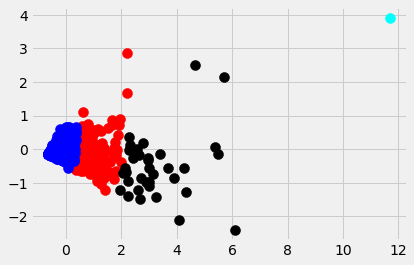

In [114]:
plt.scatter(projected_data[y_km ==0,0], projected_data[y_km == 0,1], s=100, c='red')
plt.scatter(projected_data[y_km ==1,0], projected_data[y_km == 1,1], s=100, c='black')
plt.scatter(projected_data[y_km ==2,0], projected_data[y_km == 2,1], s=100, c='blue')
plt.scatter(projected_data[y_km ==3,0], projected_data[y_km == 3,1], s=100, c='cyan')


IndexError: list index out of range

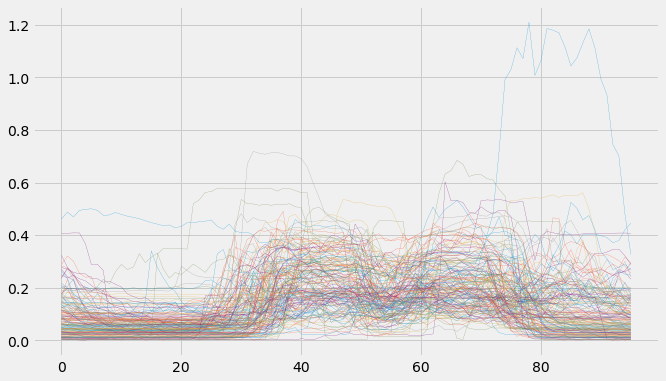

In [115]:
clus_1=[]
for x in range(len(partb)):
    if y_km[x] == 0:
        clus_1.append(x)

plt.figure(figsize = (10,6))
plt.gca()

for i in range(len(partb)):
    plt.plot(range(96),partb.iloc[clus_1[i]], '-', linewidth = 0.2)

IndexError: list index out of range

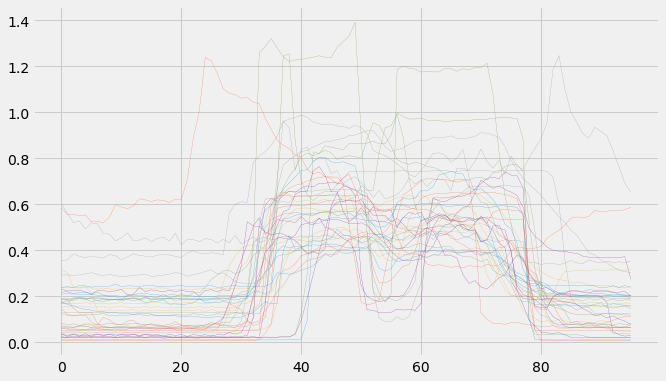

In [116]:
clus_2=[]
for x in range(len(partb)):
    if y_km[x] == 1:
        clus_2.append(x)

plt.figure(figsize = (10,6))
plt.gca()

for i in range(len(partb)):
    plt.plot(range(96),partb.iloc[clus_2[i]], '-', linewidth = 0.2)

IndexError: list index out of range

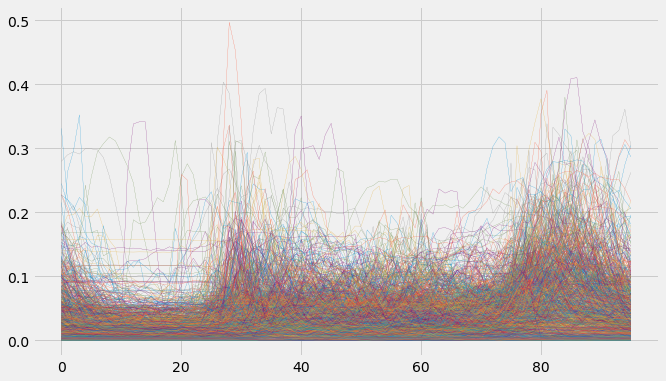

In [117]:
clus_3=[]
for x in range(len(partb)):
    if y_km[x] == 2:
        clus_3.append(x)

plt.figure(figsize = (10,6))
plt.gca()

for i in range(len(partb)):
    plt.plot(range(96),partb.iloc[clus_3[i]], '-', linewidth = 0.2)

IndexError: list index out of range

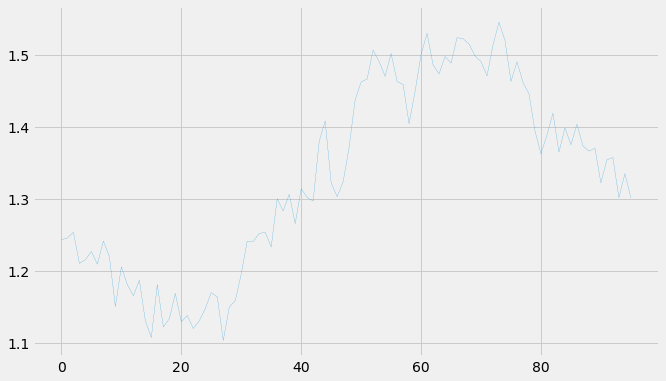

In [118]:
clus_4=[]
for x in range(len(partb)):
    if y_km[x] == 3:
        clus_4.append(x)

plt.figure(figsize = (10,6))
plt.gca()

for i in range(len(partb)):
    plt.plot(range(96),partb.iloc[clus_4[i]], '-', linewidth = 0.2)

In [124]:
nb_of_people_list

[700, 100, 430, 1, 23]